Prepared for Empty Capture?: yes
empty


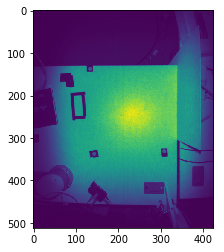

Prepared for Calibrate Capture?: yes
cali


In [12]:
import kinect_vision as kv
from image_processing import run_calibration, run_calibration_rgb
from matplotlib import pyplot as plt

import os
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR







#%matplotlib inline
import numpy as np
import cv2
calibrate_check1 = raw_input("Prepared for Empty Capture?: ")
if calibrate_check1 == "yes":
    print "empty"
    empt = kv.capture_frames()
    plt.imshow(empt['ir'])
    plt.show()
    empt_all = kv.prepare_im_array(empt)
    rgb, depth, ir = empt_all
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_empty_FINAL'), rgb=rgb, depth=depth, ir=ir)

calibrate_check2 = raw_input("Prepared for Calibrate Capture?: ")
if calibrate_check2 == "yes":
    cali = kv.capture_frames()
    print "cali"
    cali_all = kv.prepare_im_array(cali)
    rgb, depth, ir = cali_all
    
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_cal_FINAL'), rgb=rgb, depth=depth, ir=ir)

In [ ]:
import os
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR

directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)

plt.imshow(empt['ir'])
plt.show()

In [ ]:
print "hello"

{'radius': [8, 16], 'thresh': [85, 100]}
25
All Calibration points found


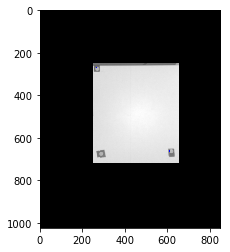

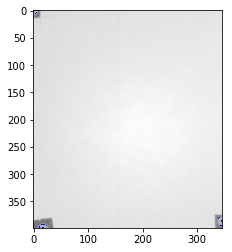

Continue?: yes
{'radius': [5, 8], 'thresh': [85, 220]}
25
All Calibration points found


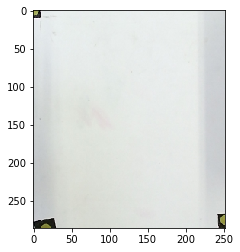

Continue?: yes
(173, 199)


In [13]:
import kinect_vision as kv
from image_processing import run_calibration, run_calibration_rgb
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import cv2
#cali_num = str(1)

#cali = kv.load_npz_as_array("im_array_cal"+cali_num, directory)
#empt = kv.load_npz_as_array("im_array_empty"+cali_num, directory)

#empt_all = kv.prepare_im_array(empt)
#cali_all = kv.prepare_im_array(cali)

#calibrate_check1 = raw_input("Prepared for Empty Capture?: ")
#if calibrate_check1 == "yes":
#    empt = kv.capture_frames()

#calibrate_check2 = raw_input("Prepared for Calibrate Capture?: ")
#if calibrate_check2 == "yes":
#    cali = kv.capture_frames()

import os
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR

directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)



empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)

rgb, depth, ir = empt_all
rgb, depth, ir = cali_all

depth_cali = run_calibration(empt_all, cali_all, adjust=True)

rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali, adjust=True)





Ready?: yes


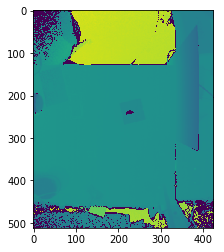

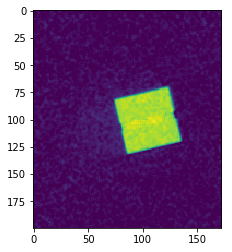

[1]


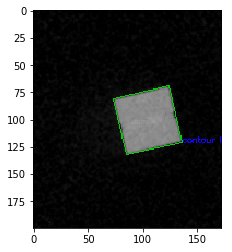

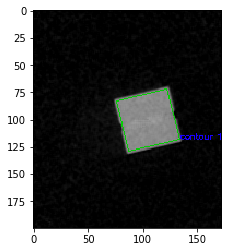

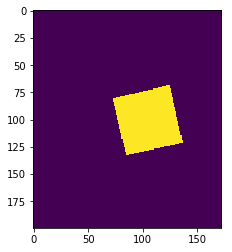

Depth Done
(173, 200)


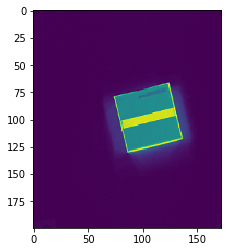

[1, 2]


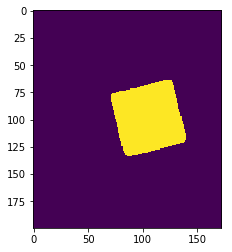

Making depth List ...
1
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
Making rgb object list...
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Length of depth and obj lists: 1 1
1 : No depth profile found
Matched based on Contour Overlap
Object is cd
~~~~~~~~~~~~~~ OBJECT ATTRIBUTES ~~~~~~~~~~~~~~~
Height:        (0, 0, 0, 0)
RGB Aspect:    0.967938575359
Circularness:  no depth
105.0 98.0
[[0.0, 0.0], [9.0, 200.0], [173.0, 193.0]]


In [5]:
from image_processing import run_image_processing_v2_depth, run_image_processing_v2_rgb
from tableObject_class import match_rgb_with_depth_v2
from vision_tools import normclean2cv2
import vision_tools as vt


capture_check = raw_input("Ready?: ")
if capture_check == "yes":
    test = kv.capture_frames()
    test_all = kv.prepare_im_array(test)

######## Process Test Image and Retrieve Depth and Contour Information from Depth and RGB Data ##########

rgb, depth, ir = test_all


normclean, sorted_family = run_image_processing_v2_depth(test_all, 
                                                         depth_cali, 
                                                         show=True)

rgbnormclean, rgb_family, test_rgbx_img = run_image_processing_v2_rgb(test_all, 
                                                                      rgb_cali, 
                                                                      depth_cali, 
                                                                      show=True)

######## Clean the images and convert them so that they are cv2 compatible ############

depth_normclean = normclean2cv2(normclean)
rgb_normclean = normclean2cv2(rgbnormclean)

test_rgb_img = vt.convert2rgb(test_rgbx_img[0])

####### Create List of Objects and match the rgb and depth data ##########
object_list = match_rgb_with_depth_v2(sorted_family, rgb_family, depth_normclean, test_rgb_img)

pick_obj = object_list['1']

if pick_obj.height[0] == 0:
    ipt = 1
    print "Object is cd"
else:
    if pick_obj.circularness > 0.75:
        ipt = 4
        print "Object is tape measure"
    else:
        if pick_obj.rgb_aspect > 0.8:
            ipt = 5
            print "Object is a box"
        else:
            if pick_obj.rgb_aspect < 0.6:
                ipt = 3
                print "Object is eraser"
            else:
                ipt = 2
                print "Object is book"
                
print "~~~~~~~~~~~~~~ OBJECT ATTRIBUTES ~~~~~~~~~~~~~~~"
print "Height:       ", pick_obj.height


print "RGB Aspect:   ", pick_obj.rgb_aspect
try:
    print "Circularness: ", pick_obj.circularness
except:
    print "no depth"


x = pick_obj.rgb_centre[0]
y = pick_obj.rgb_centre[1]
print x,y

circles = depth_cali[4]
cali_circles_init = circles-circles[0][0]
cali_circles=[]
for circ in cali_circles_init[0]:
    cali_circles.append([circ[0]/2, circ[1]/2])
print cali_circles

In [7]:

from vision_copy import pix3world_cal 
from vision_copy import pix3world 

p=[x,y]
p1, inverse = pix3world_cal(cali_circles[0],cali_circles[1], cali_circles[2])
X,Y = pix3world(p1, inverse, p)
print X,Y

[[-158.49785473]] [[-367.86687156]]


In [9]:
X[0,0]

-158.49785473024372

In [ ]:
plt.imshow(empt['depth'])
plt.show()

In [ ]:
empt_all = kv.prepare_im_array(empt)
rgb, depth,ir = empt_all

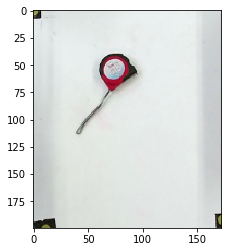

In [11]:
plt.imshow(cv2.imread('test_rgb_img.jpg'))
plt.show()